In [1]:
import numpy as np 
import pandas as pd 

In [2]:
import tensorflow as tf
from tensorflow import keras

print(tf.__version__)
print(keras.__version__)

2.11.0
2.11.0


In [3]:
import cv2
import os
import glob

In [4]:
def laod_data_as_np(Path, images, labels):
    for directory_path in Path:
        label = directory_path.split("\\")[-1]
        for image_path in glob.glob(os.path.join(directory_path, "*.jpg")) + glob.glob(os.path.join(directory_path, "*.png")):
            img = cv2.imread(image_path, cv2.IMREAD_COLOR)       
            img = cv2.resize(img, (SIZE, SIZE))
            img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)

            return images.append(img),labels.append(label)

**This contains too much Images and need augmentaions**

Overall, both methods are useful for loading image data from a directory in Keras, but flow_from_directory is more suitable for data augmentation, while image_dataset_from_directory is more suitable for use with the TensorFlow API.

In [5]:
TARGET_SIZE = 128
BATCH_SIZE = 128

In [6]:
def laod_data_with_Augementations(Path,RESCALE=1./255, SHEAR_RANGE=0.2, ZOOM_RANGE = 0.2,  HORIZONTAL_FLIP = False ,VERTICAL_FLIP = False ,TARGET_SIZE=224 ,BATCH_SIZE=32 ,CLASS_MODE='binary',SHUFFLE=True):
    datagen = keras.preprocessing.image.ImageDataGenerator(
        rescale = RESCALE,
        shear_range = SHEAR_RANGE,
        zoom_range = ZOOM_RANGE,
        horizontal_flip =  HORIZONTAL_FLIP,
        vertical_flip = VERTICAL_FLIP)
    
    generator = datagen.flow_from_directory(
        Path,
        target_size=(TARGET_SIZE, TARGET_SIZE),
        batch_size=BATCH_SIZE,
        class_mode=CLASS_MODE,
        shuffle = SHUFFLE)
    
    return generator

"""
laod_data_with_Augementations(Path,RESCALE=1./255, SHEAR_RANGE=0.2, ZOOM_RANGE = 0.2,  HORIZONTAL_FLIP = False ,VERTICAL_FLIP = False ,TARGET_SIZE=224 ,BATCH_SIZE=32 ,CLASS_MODE='binary'):

The target_size is the size of your input images, every image will be resized to this size.
color_mode: if the image is either black and white or grayscale set “grayscale” or if the image has three color channels, set “rgb”.
batch_size: No. of images to be yielded from the generator per batch.
class_mode: Set “binary” if you have only two classes to predict, if not set to“categorical”, in case if you’re developing an Autoencoder system, both input and the output would probably be the same image, for this case set to “input”.
shuffle: Set True if you want to shuffle the order of the image that is being yielded, else set False.
seed: Random seed for applying random image augmentation and shuffling the order of the image."""
    

"\nlaod_data_with_Augementations(Path,RESCALE=1./255, SHEAR_RANGE=0.2, ZOOM_RANGE = 0.2,  HORIZONTAL_FLIP = False ,VERTICAL_FLIP = False ,TARGET_SIZE=224 ,BATCH_SIZE=32 ,CLASS_MODE='binary'):\n\nThe target_size is the size of your input images, every image will be resized to this size.\ncolor_mode: if the image is either black and white or grayscale set “grayscale” or if the image has three color channels, set “rgb”.\nbatch_size: No. of images to be yielded from the generator per batch.\nclass_mode: Set “binary” if you have only two classes to predict, if not set to“categorical”, in case if you’re developing an Autoencoder system, both input and the output would probably be the same image, for this case set to “input”.\nshuffle: Set True if you want to shuffle the order of the image that is being yielded, else set False.\nseed: Random seed for applying random image augmentation and shuffling the order of the image."

In [7]:
train_generator = laod_data_with_Augementations(Path="/kaggle/input/mathematics-symbols-data/final_symbols_split_ttv/train", HORIZONTAL_FLIP = True,VERTICAL_FLIP = True,TARGET_SIZE=TARGET_SIZE ,BATCH_SIZE=BATCH_SIZE ,CLASS_MODE='sparse')
print(type(train_generator))

Found 42749 images belonging to 14 classes.
<class 'keras.preprocessing.image.DirectoryIterator'>


In [8]:
print(train_generator.class_mode)

sparse


In [9]:
class_names = list(train_generator.class_indices.keys())
print("Classes: ", class_names)
print("Count: ", len(class_names))

Classes:  ['add', 'divide', 'eight', 'five', 'four', 'multiply', 'nine', 'one', 'seven', 'six', 'subtract', 'three', 'two', 'zero']
Count:  14


In [10]:
for image_batch, labels_batch in train_generator: 
        print(image_batch.shape)
        print(labels_batch)
        break

(128, 128, 128, 3)
[ 2.  6.  3.  3. 11.  9.  0.  9.  6.  3. 11.  4.  3. 13.  3.  0. 13. 12.
  3. 11.  7.  6.  1. 10. 12. 11.  1.  5. 13.  0.  5.  0.  8.  5. 12.  3.
  6.  3. 12.  3. 10.  2.  4.  5. 13.  6. 13. 11.  0.  4. 10. 12.  6.  7.
  4.  9.  9.  3. 11.  8.  0.  7.  0.  5. 12.  2. 13. 12.  6.  7. 12.  4.
  8. 10.  7.  0. 12. 10.  6.  7. 10. 10.  5.  2.  1.  5. 11.  6.  8. 12.
  9.  5.  3.  3. 11. 12.  4. 10.  0.  1.  3. 11.  7.  4.  5.  6.  5.  8.
 11.  7.  5.  5. 13. 13.  5.  4.  8.  4. 12.  7.  2. 11.  7.  3.  8. 12.
  9.  4.]


In [11]:
test_generator = laod_data_with_Augementations(Path="/kaggle/input/mathematics-symbols-data/final_symbols_split_ttv/test", HORIZONTAL_FLIP = True,VERTICAL_FLIP = True,TARGET_SIZE=TARGET_SIZE,BATCH_SIZE=BATCH_SIZE ,CLASS_MODE='sparse')
val_generator = laod_data_with_Augementations(Path="/kaggle/input/mathematics-symbols-data/final_symbols_split_ttv/val", HORIZONTAL_FLIP = True,VERTICAL_FLIP = True,TARGET_SIZE=TARGET_SIZE, BATCH_SIZE=BATCH_SIZE ,CLASS_MODE='sparse')

Found 5356 images belonging to 14 classes.
Found 5337 images belonging to 14 classes.


In [12]:
input_shape = train_generator.image_shape
print(input_shape)

(128, 128, 3)


In [13]:
from tensorflow.keras import layers


model = keras.models.Sequential([
    layers.Conv2D(32, kernel_size = (2,2), activation='relu', input_shape=(128, 128, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (2,2), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (2,2), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(len(class_names), activation='sigmoid'),
])

model.build(input_shape=input_shape)

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 127, 127, 32)      416       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 62, 62, 64)        8256      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 31, 31, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 30, 30, 64)        16448     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 15, 15, 64)       0

In [15]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 127, 127, 32)      416       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 62, 62, 64)        8256      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 31, 31, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 30, 30, 64)        16448     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 15, 15, 64)       0

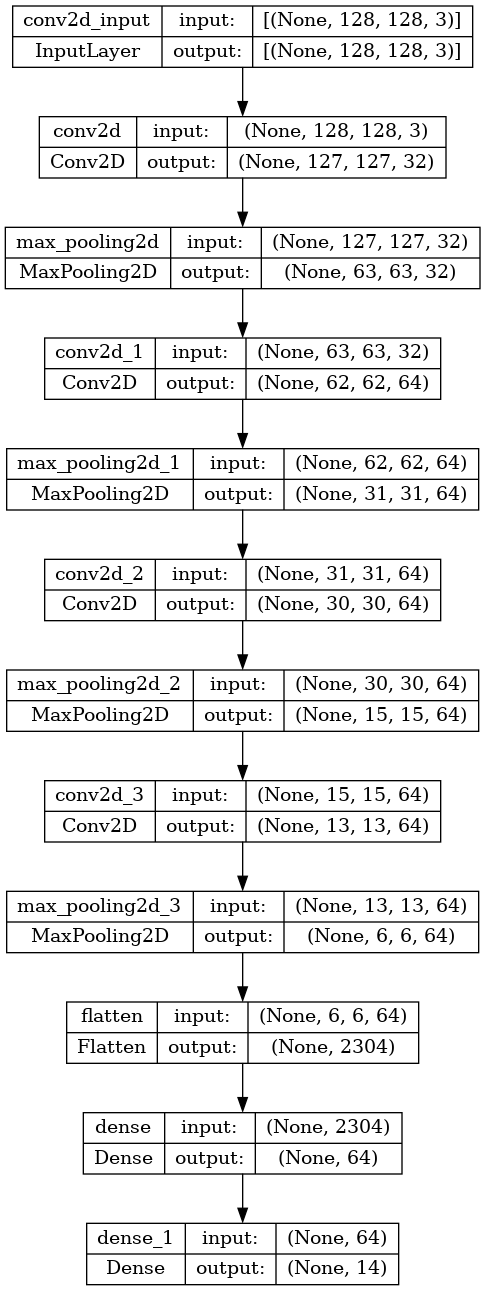

In [16]:
from tensorflow.keras.utils import plot_model
from IPython.display import Image
plot_model(model, to_file='draft.png', show_shapes=True,show_layer_names=True)
Image(filename='draft.png') 

In [17]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

callbacks = [EarlyStopping(monitor='val_loss', patience=5, verbose=1),
                ModelCheckpoint('model.hdf5',save_best_only=True)]

In [18]:
model.compile(
    optimizer='adam',
    loss= keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [19]:
history = model.fit(
    train_generator,
    batch_size=BATCH_SIZE,
    validation_data=val_generator,
    callbacks=callbacks,
    epochs=15,
)

Epoch 1/15
334/334 [==============================] - 429s 1s/step - loss: 1.0657 - accuracy: 0.6528 - val_loss: 0.5936 - val_accuracy: 0.7988
Epoch 2/15
334/334 [==============================] - 288s 861ms/step - loss: 0.5139 - accuracy: 0.8290 - val_loss: 0.4363 - val_accuracy: 0.8561
Epoch 3/15
334/334 [==============================] - 284s 852ms/step - loss: 0.3848 - accuracy: 0.8737 - val_loss: 0.3532 - val_accuracy: 0.8814
Epoch 4/15
334/334 [==============================] - 288s 861ms/step - loss: 0.3037 - accuracy: 0.8978 - val_loss: 0.2759 - val_accuracy: 0.9063
Epoch 5/15
334/334 [==============================] - 278s 831ms/step - loss: 0.2618 - accuracy: 0.9108 - val_loss: 0.2317 - val_accuracy: 0.9207
Epoch 6/15
334/334 [==============================] - 271s 812ms/step - loss: 0.2260 - accuracy: 0.9240 - val_loss: 0.2203 - val_accuracy: 0.9251
Epoch 7/15
334/334 [==============================] - 263s 789ms/step - loss: 0.2021 - accuracy: 0.9328 - val_loss: 0.1978 - va

In [20]:
scores = model.evaluate(test_generator)

42/42 [==============================] - 57s 1s/step - loss: 0.1503 - accuracy: 0.9490


In [21]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [22]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

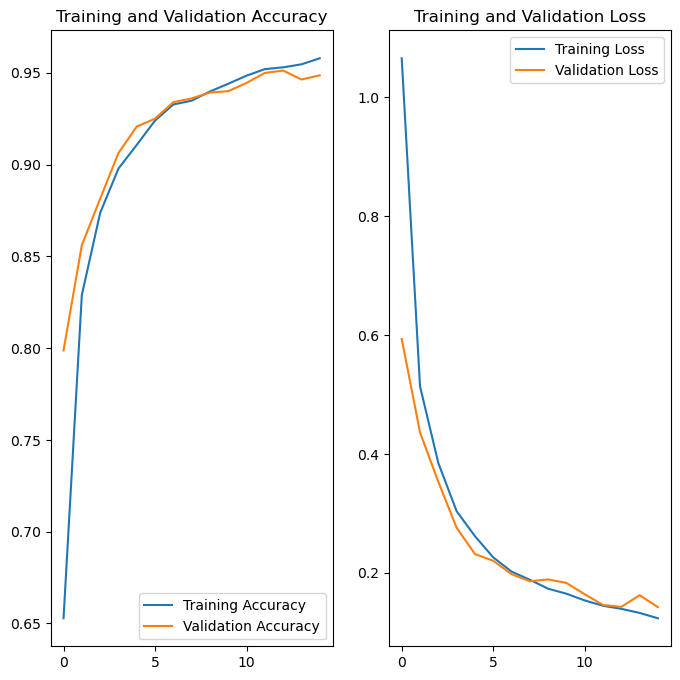

In [24]:
import matplotlib.pyplot as plt

EPOCHS = 15

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()